[![View notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PyPartMC/blob/main/examples/particle_simulation_with_camp.ipynb)   
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PyPartMC/blob/main/examples/particle_simulation_with_camp.ipynb)    
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PyPartMC.git/main?urlpath=lab/tree/examples/particle_simulation_with_camp.ipynb)    
[![ARM JupyterHub](https://img.shields.io/static/v1?label=launch%20in&logo=jupyter&color=lightblue&message=ARM+JupyterHub)](https://jupyterhub.arm.gov/hub/user-redirect/git-pull?repo=https%3A//github.com/open-atmos/PyPartMC&branch=main&urlPath=) (requires [logging in with ARM account](https://www.arm.gov/capabilities/computing-resources) and directing Jupyter to a notebook within the cloned repo)

In [1]:
# This file is a part of PyPartMC licensed under the GNU General Public License v3
# Copyright (C) 2024 University of Illinois Urbana-Champaign
# Authors:
#  - https://github.com/compdyn/partmc/graphs/contributors
#  - https://github.com/open-atmos/PyPartMC/graphs/contributors

In [2]:
import sys
import os
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PyPartMC')
elif 'JUPYTER_IMAGE' in os.environ and '.arm.gov' in os.environ['JUPYTER_IMAGE']:
    !pip --quiet install PyPartMC open_atmos_jupyter_utils
    _pypartmc_path = !pip show PyPartMC | fgrep Location | cut -f2 -d' '
    sys.path.extend(_pypartmc_path if _pypartmc_path[0] not in sys.path else [])

In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
from open_atmos_jupyter_utils import show_plot
import PyPartMC as ppmc
from PyPartMC import si

In [4]:
N_PART = 100

In [5]:
env_state = ppmc.EnvState(
    {
        "rel_humidity": 0.0,
        "latitude": 0,
        "longitude": 0,
        "altitude": 0 * si.m,
        "start_time": 21600 * si.s,
        "start_day": 200,
    }
)

In [6]:
camp_config = {
  "camp-files" : [
    "aerosol_representation.json",
    "aerosol_phases.json",
    "monarch_mod37/cb05_abs_tol.json",
    "monarch_mod37/cb05_mechanism_without_R142_R143.json",
    "monarch_mod37/cb05_species.json",
    "monarch_mod37/custom_species.json",
    "monarch_mod37/partitioning_species_params.json",
    "monarch_mod37/tsigaridis_2_product_SOA_scheme/mechanism.json",
    "monarch_mod37/tsigaridis_2_product_SOA_scheme/species.json"
  ]
}

with open('config.json', 'w', encoding='utf-8') as f:
    json.dump(camp_config, f, indent=4)

In [7]:
aerosol_rep = {
  "camp-data" : [
    {
      "name" : "PartMC single particle",
      "type" : "AERO_REP_SINGLE_PARTICLE",
      "maximum computational particles" : N_PART*2
    }
  ]
}

with open('aerosol_representation.json', 'w', encoding='utf-8') as f:
    json.dump(aerosol_rep, f, indent=4)

In [8]:
aerosol_phases = {
  "description" : "These aerosol phases correspond to the MONARCH 'mod37' configuration",
  "camp-data" : [
    {
      "name" : "dust",
      "type": "AERO_PHASE",
      "species" : [ "LHD_DUST", "LLD_DUST" ],
      "notes" : {
        "MLD 02/05/2018" : "consider replacing this with a set of inorganic species"
      }
    },
    {
      "name" : "sea_salt",
      "type" : "AERO_PHASE",
      "species" : [ "SEA_SALT" ],
      "notes" : {
        "MLD 02/05/2018" : "consider replacing with H2O, Na+, Cl-"
      }
    },
    {
      "name" : "organic_matter",
      "type" : "AERO_PHASE",
      "species" : [ "POA", "ISOP-P1_aero", "ISOP-P2_aero", "TERP-P1_aero", "TERP-P2_aero" ]
    },
    {
      "name" : "black_carbon",
      "type" : "AERO_PHASE",
      "species" : [ "BC_phob", "BC_phil" ]
    },
    {
      "name" : "other_PM",
      "type" : "AERO_PHASE",
      "species" : [ "other_PM", "other_other_PM" ],
      "description" : "unspecified particulate matter"
    }
  ]
}

with open('aerosol_phases.json', 'w', encoding='utf-8') as f:
    json.dump(aerosol_phases, f, indent=4)

In [9]:
camp_core = ppmc.CampCore("config.json")
photolysis = ppmc.Photolysis(camp_core)

In [10]:
gas_data = ppmc.GasData(camp_core)
aero_data = ppmc.AeroData(camp_core)

In [11]:
gas_state = ppmc.GasState(gas_data)

input_gas_state = (
                     {"NO": [0.1E+00]},
                     {"NO2": [1.0E+00]},
                     {"O3": [5.0E+01]},
                     {"H2O2": [1.1E+00]},
                     {"CO": [2.1E+02]},
                     {"SO2": [0.8E+00]},
                     {"NH3": [0.5E+00]},
                     {"HCL": [0.7E+00]},
                     {"CH4": [2.2E+03]},
                     {"ETHA": [1.0E+00]},
                     {"FORM": [1.2E+00]},
                     {"MEOH": [1.2E-01]},
                     {"MEPX": [0.5E+00]},
                     {"ALD2": [1.0E+00]},
                     {"PAR": [2.0E+00]},
                     {"ETH": [0.2E+00]},
                     {"OLE": [2.3E-02]},
                     {"IOLE": [3.1E-04]},
                     {"TOL": [0.1E+00]},
                     {"XYL": [0.1E+00]},
                     {"NTR": [0.1E+00]},
                     {"PAN": [0.8E+00]},
                     {"AACD": [0.2E+00]},
                     {"ROOH": [2.5E-02]},
                     {"ISOP": [5.0E+00]},
                     {"O2": [2.095E+08]},
                     {"N2": [7.8E+08]},
                     {"H2": [5.6E+02]},
                     {"M": [1.0E+09]}
 )

gas_state.mix_rats = input_gas_state

In [12]:
times = [0 * si.s]
back_gas = [{"time": times},
            {"rate": [0 / si.s]},
                     {"NO": [0.1E+00]},
                     {"NO2": [1.0E+00]},
                     {"O3": [5.0E+01]},
                     {"H2O2": [1.1E+00]},
                     {"CO": [2.1E+02]},
                     {"SO2": [0.8E+00]},
                     {"NH3": [0.5E+00]},
                     {"HCL": [0.7E+00]},
                     {"CH4": [2.2E+03]},
                     {"ETHA": [1.0E+00]},
                     {"FORM": [1.2E+00]},
                     {"MEOH": [1.2E-01]},
                     {"MEPX": [0.5E+00]},
                     {"ALD2": [1.0E+00]},
                     {"PAR": [2.0E+00]},
                     {"ETH": [0.2E+00]},
                     {"OLE": [2.3E-02]},
                     {"IOLE": [3.1E-04]},
                     {"TOL": [0.1E+00]},
                     {"XYL": [0.1E+00]},
                     {"NTR": [0.1E+00]},
                     {"PAN": [0.8E+00]},
                     {"AACD": [0.2E+00]},
                     {"ROOH": [2.5E-02]},
                     {"ISOP": [5.0E+00]},
                     {"O2": [2.095E+08]},
                     {"N2": [7.8E+08]},
                     {"H2": [5.6E+02]},
                     {"M": [1.0E+09]}
           ]

gas_emit_times = [0, 43200]

gas_emit_rates = np.zeros(len(gas_emit_times))
gas_emit_rates[0] = 1.0
gas_emit_rates[1] = 0.0

SO2 = [1.06E-09, 1.06E-09]
NO2 = [7.56E-12, 7.56E-12]
NO = [1.44E-10, 1.44E-10]
CO = [1.96E-09, 1.96E-09]
ALD2 = [4.25E-12, 4.25E-12]
FORM = [1.02E-11, 1.02E-11]
ETH = [4.62E-11, 4.62E-11]
IOLE = [1.49E-11, 1.49E-11]
OLE = [1.49E-11, 1.49E-11]
TOL = [1.53E-11, 1.53E-11]
XYL = [1.40E-11, 1.40E-11]
PAR = [4.27E-10, 4.27E-10]
ISOP = [6.03E-12, 6.03E-12]
MEOH = [5.92E-13, 5.92E-13]

emit_gas = [
    {"time": gas_emit_times},
    {"rate": list(gas_emit_rates)},
    {"SO2": SO2},
    {"NO2": NO2},
    {"NO": NO},
    {"CO": CO},
    {"ALD2": ALD2},
    {"FORM": FORM},
    {"ETH": ETH},
    {"IOLE": IOLE},
    {"OLE": OLE},
    {"TOL": TOL},
    {"XYL": XYL},
    {"PAR": PAR},
    {"ISOP": ISOP},
    {"MEOH": MEOH},
]

AERO_DIST_BACKGROUND = {
    "back_small": {
        "mass_frac": [{"organic_matter.POA": [1]}],
        "diam_type": "geometric",
        "mode_type": "log_normal",
        "num_conc": 0 / si.m**3,
        "geom_mean_diam": 0.02 * si.um,
        "log10_geom_std_dev": 0.161,
    },
}

AERO_DIST_EMIT = {
    "gasoline": {
        "mass_frac": [{"organic_matter.POA": [1]}],
        "diam_type": "geometric",
        "mode_type": "log_normal",
        "num_conc": 0.0 / si.m**3,
        "geom_mean_diam": 5e-8 * si.m,
        "log10_geom_std_dev": 0.24,
    },
}

In [13]:
time_timeseries = [0, 86400]
pressure_timeseries = [1e5, 1e5]
temp_timeseries = [290.016, 290.016]
height_timeseries = [1.0, 1.0]

In [14]:
scenario = ppmc.Scenario(
    gas_data,
    aero_data,
    {
        "temp_profile": [{"time": time_timeseries}, {"temp": temp_timeseries}],
        "pressure_profile": [
            {"time": time_timeseries},
            {"pressure": pressure_timeseries},
        ],
        "height_profile": [{"time": time_timeseries}, {"height": height_timeseries}],
        "gas_emissions": emit_gas,
        "gas_background": back_gas,
        "aero_emissions": [
            {"time": [0 * si.s]},
            {"rate": [0 / si.s]},
            {"dist": [[AERO_DIST_EMIT]]},
        ],
        "aero_background": [
            {"time": [0 * si.s]},
            {"rate": [0 / si.s]},
            {"dist": [[AERO_DIST_BACKGROUND]]},
        ],
        "loss_function": "none",
    },
)

In [15]:
T_INITIAL = 0.0
scenario.init_env_state(env_state, T_INITIAL)

In [16]:
AERO_DIST_INIT = [
    {
        "init_small": {
            "mass_frac": [{"organic_matter.POA": [1]}],
            "diam_type": "geometric",
            "mode_type": "log_normal",
            "num_conc": 3.2e9 / si.m**3,
            "geom_mean_diam": 2.0e-8 * si.m,
            "log10_geom_std_dev": 0.161,
        },
        "init_large": {
            "mass_frac": [{"organic_matter.POA": [1]}],
            "diam_type": "geometric",
            "mode_type": "log_normal",
            "num_conc": 2.9e9 / si.m**3,
            "geom_mean_diam": 1.16e-7 * si.m,
            "log10_geom_std_dev": 0.217,
        },
        "init_coarse": {
            "mass_frac": [{"organic_matter.POA": [1]}],
            "diam_type": "geometric",
            "mode_type": "log_normal",
            "num_conc": 0.3e6 / si.m**3,
            "geom_mean_diam": 1.8e-6 * si.m,
            "log10_geom_std_dev": 0.38021124171160603,
        }
    }
]

aero_dist_init = ppmc.AeroDist(aero_data, AERO_DIST_INIT)

In [17]:
run_part_opt = ppmc.RunPartOpt(
    {
        "output_prefix": "urban_plume",
        "do_coagulation": False,
        "t_max": 86400 * si.s,
        "del_t": 6 * si.s,
        "do_camp_chem": True,
    }
)

aero_state = ppmc.AeroState(aero_data, N_PART, 'nummass_source', camp_core)
aero_state.dist_sample(
    aero_dist_init,
    sample_prop=1.0,
    create_time=0.0,
    allow_doubling=True,
    allow_halving=True,
)

58

In [18]:
N_STEPS = int(run_part_opt.t_max / run_part_opt.del_t)
num_conc = np.zeros(N_STEPS + 1)
num_conc[0] = aero_state.total_num_conc
mass_conc = np.zeros(N_STEPS + 1)
mass_conc[0] = aero_state.total_mass_conc
time = np.zeros(N_STEPS + 1)
gas_mix_rat = np.zeros((N_STEPS + 1, gas_state.n_spec))
gas_mix_rat[0, :] = gas_state.mix_rats

height = np.zeros((N_STEPS + 1))
temperature = np.zeros((N_STEPS + 1))
rh = np.zeros((N_STEPS + 1))

height[0] = env_state.height
temperature[0] = env_state.temp
rh[0] = env_state.rh

diam_grid = ppmc.BinGrid(30, "log", 1e-9, 1e-5)
dists = []
dry_diameters = aero_state.dry_diameters
num_concs = aero_state.num_concs
dists.append(ppmc.histogram_1d(diam_grid, dry_diameters, num_concs))

last_output_time = 0.
last_progress_time = 0.
i_output = 1

for i_time in range(1,N_STEPS + 1):
    (last_output_time, last_progress_time, i_output) = ppmc.run_part_timestep(
        scenario,
        env_state,
        aero_data,
        aero_state,
        gas_data,
        gas_state,
        run_part_opt,
        camp_core,
        photolysis,
        i_time,
        T_INITIAL,
        last_output_time,
        last_progress_time,
        i_output
    )
    num_conc[i_time] = aero_state.total_num_conc
    mass_conc[i_time] = aero_state.total_mass_conc
    time[i_time] = env_state.elapsed_time
    gas_mix_rat[i_time, :] = gas_state.mix_rats
    height[i_time] = env_state.height
    temperature[i_time] = env_state.temp
    rh[i_time] = env_state.rh
    if np.mod(i_time * run_part_opt.del_t, 3600.0) == 0:
        dry_diameters = aero_state.dry_diameters
        num_concs = aero_state.num_concs
        dists.append(ppmc.histogram_1d(diam_grid, dry_diameters, num_concs))

In [19]:
plt.rcParams.update({'font.size': 9})
plt.rcParams.update({'figure.figsize': (3.08,2.5)})
plt.rcParams.update({"axes.grid" : True})

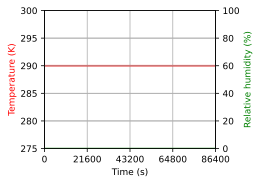

HTML(value="<a href='./tmpucsagmhm.pdf' target='_blank'>./tmpucsagmhm.pdf</a><br>")

In [20]:
plt.plot(time,temperature,'r')
plt.ylabel('Temperature (K)', color='r')
plt.ylim([275,300])
plt.xticks(np.linspace(0, time[-1], 5))
plt.xlim([0,time[-1]])
plt.xlabel('Time (s)')
plt.twinx()
plt.plot(time,rh*100,'g')
plt.ylabel('Relative humidity (%)', color='g')
plt.ylim([0,100])
show_plot()

In [21]:
def set_tickmarks(axes, n_ticks):
    ylims = axes.get_ylim()
    if np.log10(ylims[0]) > 1:
        val = -int(np.ceil(np.abs(np.log10(ylims[0])))) + 1
    else:
        val = int(np.ceil(np.abs(np.log10(ylims[0])))) + 1     
    ymin = round(ylims[0] - .1 * ylims[0], val)
    ymax = round(ylims[1] + .1 * ylims[1], val)
    plt.ylim([ymin, ymax])
    plt.yticks(np.linspace(ymin, ymax, n_ticks))

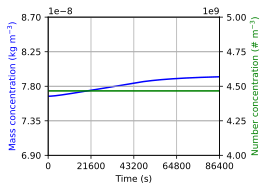

HTML(value="<a href='./tmp0zrp6oao.pdf' target='_blank'>./tmp0zrp6oao.pdf</a><br>")

In [22]:
plt.plot(time, mass_conc, "b", label="mass conc")
plt.ylabel("Mass concentration (kg m$^{-3}$)", color='b')
plt.xlabel("Time (s)")
set_tickmarks(plt.gca(), 5)
plt.twinx()
plt.plot(time, num_conc, "g", label="num conc")
plt.xticks(np.linspace(0, time[-1], 5))
plt.xlim([time[0],time[-1]])
set_tickmarks(plt.gca(), 5)
plt.ylabel(r"Number concentration ($\#$ m$^{-3}$)", color='g')
show_plot()

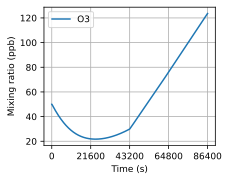

HTML(value="<a href='./tmpdlajj2uq.pdf' target='_blank'>./tmpdlajj2uq.pdf</a><br>")

In [23]:
gases = ["O3"]
for i_spec, spec in enumerate(gases):
    i_spec = gas_data.spec_by_name(spec)
    l, = plt.plot(time, gas_mix_rat[:, i_spec], label=spec)
plt.xlabel("Time (s)")
plt.ylabel("Mixing ratio (ppb)")
plt.xticks(np.linspace(0, time[-1], 5))
plt.legend()
show_plot()

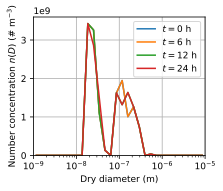

HTML(value="<a href='./tmpjuit2l7r.pdf' target='_blank'>./tmpjuit2l7r.pdf</a><br>")

In [24]:
plt.plot(diam_grid.centers, dists[0],label='$t = 0$ h')
plt.plot(diam_grid.centers, dists[6],label='$t = 6$ h')
plt.plot(diam_grid.centers, dists[12],label='$t = 12$ h')
plt.plot(diam_grid.centers, dists[24],label='$t = 24$ h')
plt.xscale("log")
plt.xlabel("Dry diameter (m)")
plt.ylabel(r"Number concentration $n(D)$ ($\#$ m$^{-3}$)")
plt.ylim(bottom=0)
plt.legend()
plt.xlim([diam_grid.edges[0],diam_grid.edges[-1]])
show_plot()